In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)
!pip install -U efficientnet==0.0.4

TensorFlow 1.x selected.
1.15.2
Requirement already up-to-date: efficientnet==0.0.4 in /usr/local/lib/python3.6/dist-packages (0.0.4)


In [2]:
# Dataloder ： utils/loder.pyに記述するべき内容
%load_ext autoreload
import numpy as np
import cv2
from math import ceil
from scipy import ndimage
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
from tensorflow.keras import utils
import keras
#from tensorflow.keras.datasets.cifar10 import load_data
from tensorflow.keras.datasets.mnist import load_data


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [3]:
from dataloder import Dataloder
dataloder_ins = Dataloder()
dataloder_ins.get_data(resize_mode = True, resize_shape = (56,56), cvtColor_mode = True)

print("x_train shape : {}".format(dataloder_ins.x_train.shape))
print("y_train shape : {}".format(dataloder_ins.y_train.shape))

x_train shape : (49500, 56, 56, 3)
y_train shape : (49500, 10)


In [5]:
# モジュールの構造：uitils.modules.pyに記述
from efficientnet import EfficientNetB0
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import GlobalAveragePooling2D, Dense, Dropout
from keras.models import Model

class EfficientNet(object):
    def __init__(self, cut_size, channel, category_count):
        self.cut_size = cut_size
        self.channel = channel
        self.category_count = category_count
        
    def bottleneck(self, x):
        x = GlobalAveragePooling2D()(x)
        x = Dense(512, activation='relu')(x)
        x = Dropout(rate=0.25)(x)
        x = Dense(self.category_count, activation='sigmoid')(x)
        return x
    
    def getTrainModel(self):
        input_shape = (self.cut_size["height"], self.cut_size["width"], self.channel)
        print("input_shape : {}".format(input_shape))
        
        # EfficientNetのオプションについては随時調査（やりたいのは１から学習）
        effnet_instance = EfficientNetB0(input_shape = input_shape,  weights='imagenet', include_top=False)
        x = effnet_instance.output
        x = self.bottleneck(x)

        model = Model(inputs=effnet_instance.input, outputs=x)
        return model

ImportError: ignored

In [16]:
from efficientnet import EfficientNet

data_num = dataloder_ins.x_train.shape[0]
cut_size = {
    "height" : dataloder_ins.x_train.shape[1],
    "width" : dataloder_ins.x_train.shape[2]
}
channel = dataloder_ins.x_train.shape[3]
category_count = dataloder_ins.y_train.shape[1]

print(data_num)
print(cut_size)
print(channel)
print(category_count)

efficientnet_ins = EfficientNet(cut_size, channel, category_count)

49500
{'height': 56, 'width': 56}
3
10


AttributeError: ignored

In [7]:
from solver import Solver
solver_ins = Solver(dataloder_ins, efficie)
solver_ins.get_mode()

NameError: ignored

In [47]:

ins = Solver2(dataloder_ins, model_ins, batch_size=10, n_epochs=4)
model = ins.get_model()

input_shape : (28, 28, 3)


In [49]:
ins.train(model)

x_train shape (49500, 28, 28, 3)
y_train shape (49500, 10)
Train on 49500 samples, validate on 10500 samples
Epoch 1/4
49500/49500 [==============================] - 1007s 20ms/step - loss: 0.0764 - categorical_accuracy: 0.9184 - val_loss: 0.4093 - val_categorical_accuracy: 0.7731
Epoch 2/4
49500/49500 [==============================] - 991s 20ms/step - loss: 0.0668 - categorical_accuracy: 0.9430 - val_loss: 0.4293 - val_categorical_accuracy: 0.8477
Epoch 3/4
49500/49500 [==============================] - 993s 20ms/step - loss: 0.0647 - categorical_accuracy: 0.9532 - val_loss: 4.9004 - val_categorical_accuracy: 0.7566
Epoch 4/4
49500/49500 [==============================] - 971s 20ms/step - loss: 0.0621 - categorical_accuracy: 0.9583 - val_loss: 0.2279 - val_categorical_accuracy: 0.8878


In [0]:
# model.compileとmodel.fit : solver.pyに記載
from keras.optimizers import RMSprop
from keras.callbacks import Callback, CSVLogger

class Solver(object):
    def __init__(self, dataloder_instance, batch_size, n_epochs):
        self.data_loader = dataloder_instance
        self.batch_size = batch_size
        self.n_epochs = n_epochs
        self.n_classes = 10
        print("n_classes : {}".format(self.n_classes))
        
        self.model = get_model(input_shape = self.data_loader.x_train.shape, n_classes = self.n_classes)
        
        # ファインチューニングする場合は専用のAdamオプティマイザを使う
        # optimizer = get_adam_for_fine_tuning(lr=1e-3, decay=1e-5, multiplier=0.01, model=model)
        
        self.model.compile(loss='categorical_crossentropy', optimizer=RMSprop(),
                  metrics=['accuracy'])
    
    def train(self):
        # callbackを定義する場合はここに記述
        self.model.fit(self.data_loader.x_train, self.data_loader.y_train, batch_size=self.batch_size, \
                       epochs=self.n_epochs, verbose=1, validation_data=(self.data_loader.x_valid, self.data_loader.y_valid),
                       callbacks = [lr_schedule, model_checkpoint]callbacks = [lr_schedule, model_checkpoint])

In [0]:
dataloder_ins = Dataloder()
dataloder_ins.get_data(channel = 1)

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
solver_ins = Solver(dataloder_ins, batch_size=10, n_epochs=1)
model = solver_ins.model

n_classes : 10
input_shape : (49500, 28, 28, 1)
inputTensor("input_1:0", shape=(?, 28, 28, 1), dtype=float32)
Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [0]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
global_average_pooling2d_1 ( (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650 

(1, 10, 10, 64)
(3, 3, 1, 16)
(16,)
(3, 3, 16, 32)
(32,)
(3, 3, 32, 64)
(64,)
(64, 10)
(10,)
(64, 10)
(10, 10, 64)
(10, 10, 10)


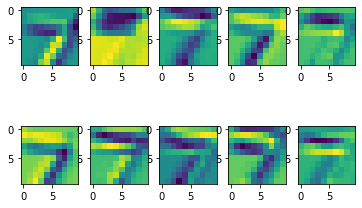

In [0]:
#中間層の結果を取得
layer_name = 'conv2d_5'
intermediate_layer_model = Model(inputs=solver_ins.model.input,
                                 outputs=solver_ins.model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(dataloder_ins.x_test[0:1])
print(np.shape(intermediate_output))

#中間の重みを取得
w = solver_ins.model.get_weights()
for i in range(len(w)):
    print(w[i].shape)

# FeatureMapを10クラス分計算
print(w[-2].shape)
print(intermediate_output[0].shape)

# 全クラスのfeaturemap計算
feature_map, = intermediate_output @ w[-2]
print(feature_map.shape)
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(feature_map[:,:,i])